# San Francisco Crime Classification
*Predict the category of crimes that occurred in the city by the bay*

[Kaggle Project Link](https://www.kaggle.com/c/sf-crime)

From 1934 to 1963, San Francisco was infamous for housing some of the world's most notorious criminals on the inescapable island of Alcatraz.

Today, the city is known more for its tech scene than its criminal past. But, with rising wealth inequality, housing shortages, and a proliferation of expensive digital toys riding BART to work, there is no scarcity of crime in the city by the bay.

From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred.

We're also encouraging you to explore the dataset visually. What can we learn about the city through visualizations like this Top Crimes Map? The top most up-voted scripts from this competition will receive official Kaggle swag as prizes.

### Packages

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
from IPython.display import display
import tools as t
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import random
%matplotlib inline

### Exploratory Data Analysis

In [2]:
# Load training data
train = pd.read_csv('c:/users/sconner/Desktop/W207/W207_Final/data/train.csv')
# Load test data
test = pd.read_csv('c:/users/sconner/Desktop/W207/W207_Final/data/test.csv')

In [3]:
# Brief glimpse of data
train.head(25)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


#### Findings

    (1) 'Dates' column includes a good amount of detail -- year, month, and time of day. Additionally, there is a 'DayOfWeek' column which also includes the day of week. The 'Dates' column can be subset into three different columns though year likely won't be quite as useful unless we opt to weight more recent results to better incorporate trends. Though the time of year and day of the week will likely be useful since certain crimes are often more probably based on the season and day of the week.
    (2) The columns 'PdDistrict', 'Address', 'X', and 'Y' all refer to location. This will be beneficial since certain crimes will probably be more likely in certain district and will aid in classification. 'X' and 'Y' seem to be coordinates so those could potentially be concatenated and used to generate informative visualizations.
    (3) Furthermore, the 'Address' column seems to be specific to one location, block, or corner. Perhaps we can subset this information which will better classify crime based on the type of address information given. (i.e., vandalism will be more likely for an exact address while vehicle theft be more likely for a block).

In [4]:
# Better understand the nature of values in each column
train.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.416420,37.775421
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.406959,37.784369


#### Findings

    (1) Dates are obviously producing non-numeric values since it includes too much information.
    (2) There are (39) unique values in 'categories' but (879) unique values in 'Descript'. My assumption is that the number of unique descriptions can be reduced to prevent overfitting.
    (3) Only (10) PD districts -- great start for simplication. However, we might be able to find additional insights by clustering locations using the given coordinates.

In [5]:
train['Descript'].unique()

array(['WARRANT ARREST', 'TRAFFIC VIOLATION ARREST',
       'GRAND THEFT FROM LOCKED AUTO', 'GRAND THEFT FROM UNLOCKED AUTO',
       'STOLEN AUTOMOBILE', 'PETTY THEFT FROM LOCKED AUTO',
       'MISCELLANEOUS INVESTIGATION',
       'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', 'FOUND PROPERTY',
       'ROBBERY, ARMED WITH A KNIFE',
       'AGGRAVATED ASSAULT WITH BODILY FORCE', 'TRAFFIC VIOLATION',
       'ROBBERY, BODILY FORCE', 'STAY AWAY OR COURT ORDER, NON-DV RELATED',
       'LOST PROPERTY', 'ATTEMPTED THEFT FROM LOCKED VEHICLE',
       'CIVIL SIDEWALKS, CITATION', 'MALICIOUS MISCHIEF, VANDALISM',
       'SUSPICIOUS PACKAGE', 'AIDED CASE, MENTAL DISTURBED',
       'PETTY THEFT SHOPLIFTING', 'PROBATION VIOLATION',
       'STAY AWAY ORDER VIOLATION, DV RELATED',
       'DRIVERS LICENSE, SUSPENDED OR REVOKED', 'STOLEN MOTORCYCLE',
       'GRAND THEFT FROM PERSON', 'BURGLARY, VEHICLE (ARREST MADE)',
       'ATTEMPTED ROBBERY ON THE STREET WITH BODILY FORCE',
       'PETTY THEFT FROM A B

#### Findings

    (1) After further review, the "Descript" values are typically an elaboration of the crime category. For our purposes, it might be best to scrape this column to avoid overfitting.

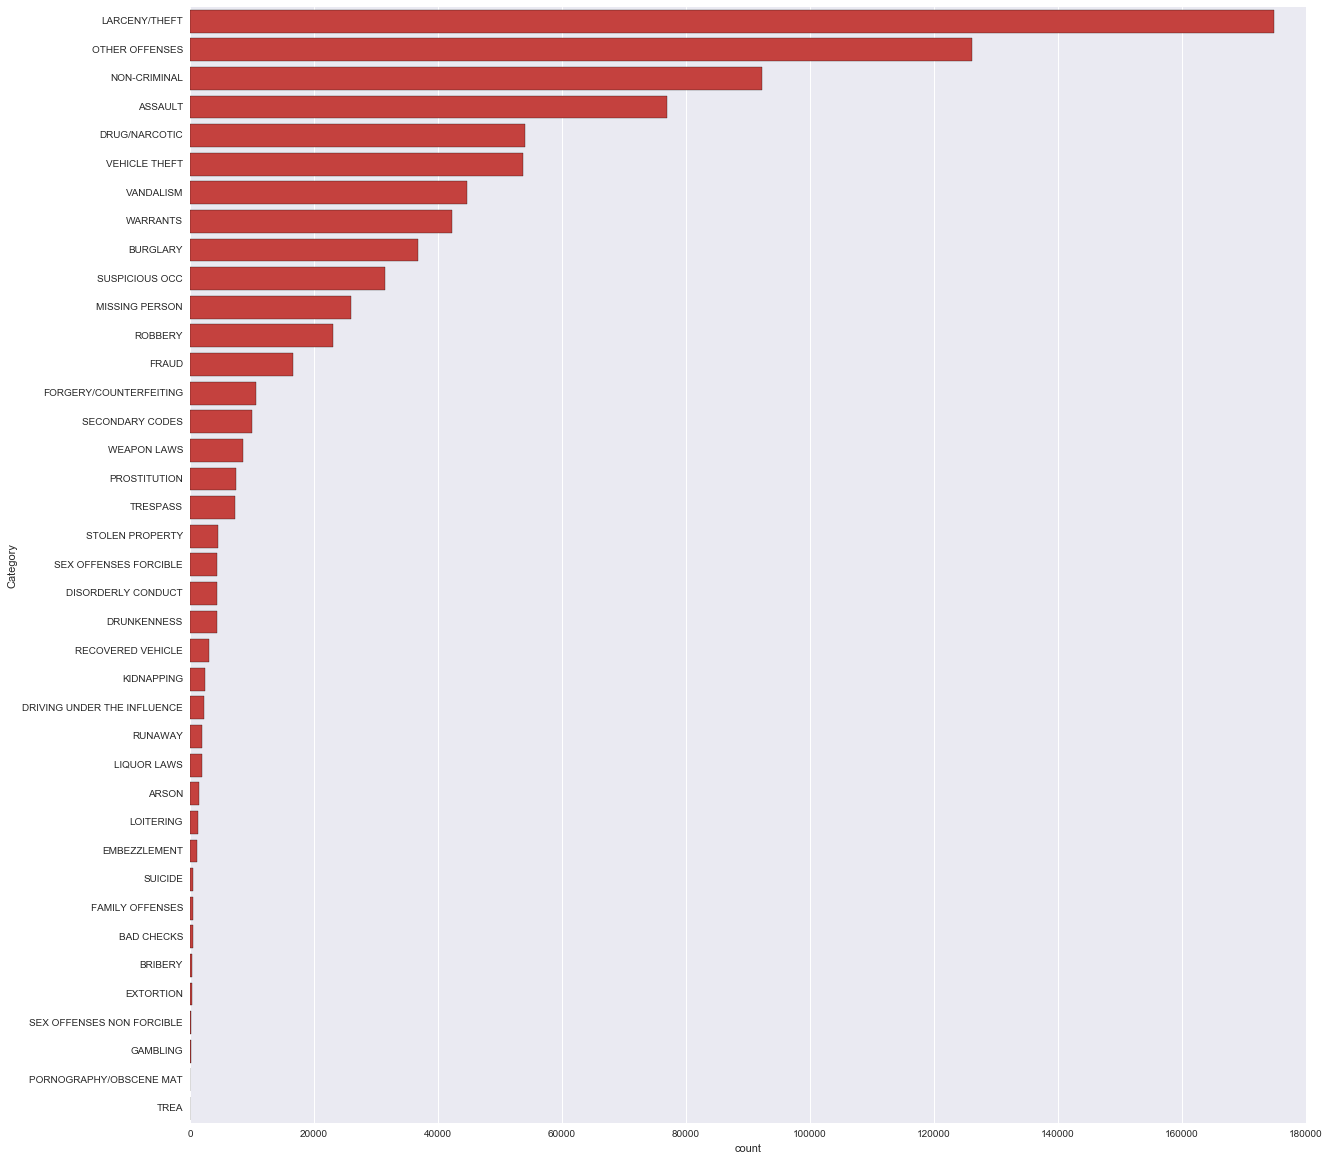

In [6]:
# Crime Category Frequency
red = ["#db2b27"]
plt.figure(figsize=(20, 20))
sns.countplot(y=train['Category'], data=train, palette = sns.color_palette(red), order=train.Category.value_counts().index)

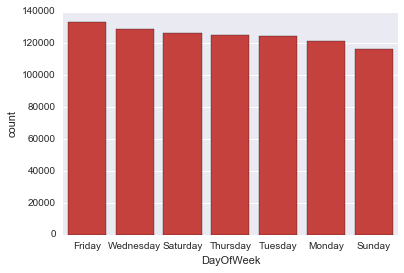

In [7]:
# Crime Frequency per Day of Week
sns.countplot(x=train['DayOfWeek'], data=train, palette = sns.color_palette(red), 
              order=train.DayOfWeek.value_counts().index)

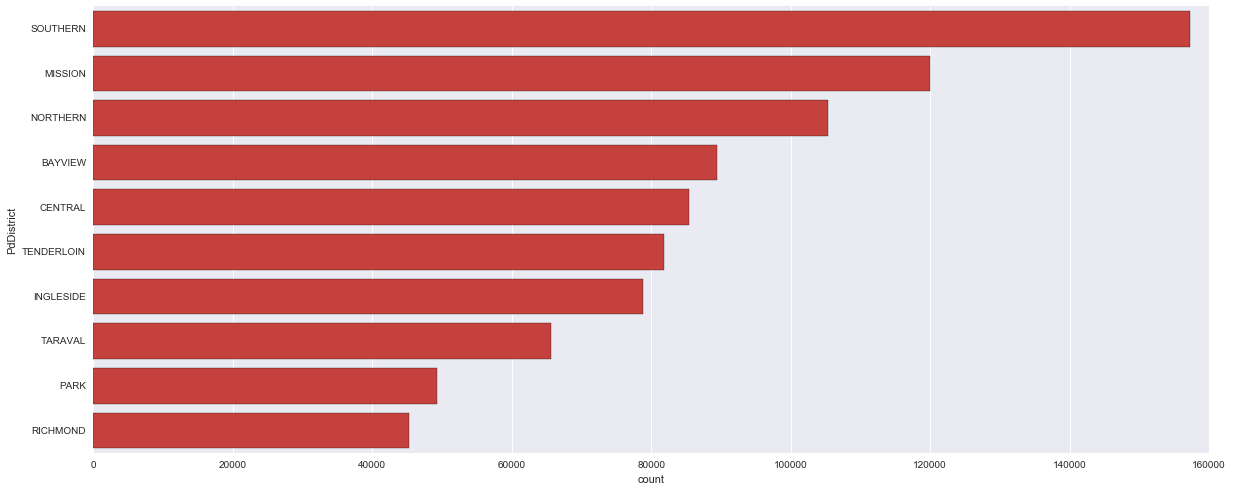

In [8]:
# District
plt.figure(figsize=(20, 8))
sns.countplot(y=train['PdDistrict'], data=train, palette = sns.color_palette(red), order=train.PdDistrict.value_counts().index)

### Cleaning

In [9]:
# Add additional time based columns.
train['Dates'] = pd.to_datetime(train['Dates'])
train['Year'] = train['Dates'].dt.year
train['Month'] = train['Dates'].dt.month
train['Hour'] = train['Dates'].dt.hour
train['Minute'] = train['Dates'].dt.minute

# Add additional time based columns.
test['Dates'] = pd.to_datetime(test['Dates'])
test['Year'] = test['Dates'].dt.year
test['Month'] = test['Dates'].dt.month
test['Hour'] = test['Dates'].dt.hour
test['Minute'] = test['Dates'].dt.minute

# Review changes
train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour,Minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,23,30


In [10]:
train.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour,Minute
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN,NaN,NaN,NaN,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN,NaN,NaN,NaN,NaN
first,2003-01-06 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-05-13 23:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020,2008.712046,6.436509,13.412655,20.155026
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893,3.631194,3.428972,6.549573,18.594915
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879,2003.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427,2006.000000,3.000000,9.000000,0.000000


In [11]:
# Create corners and blocks
train['Address'] = train['Address'].str.lower()
train['Corner'] = train['Address'].apply(lambda x: 1 if "/" in x else 0)
train['Block'] = train['Address'].apply(lambda x: 1 if "block" in x else 0)

test['Address'] = test['Address'].str.lower()
test['Corner'] = test['Address'].apply(lambda x: 1 if "/" in x else 0)
test['Block'] = test['Address'].apply(lambda x: 1 if "block" in x else 0)

In [12]:
# Review changes
train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour,Minute,Corner,Block
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",oak st / laguna st,-122.425892,37.774599,2015,5,23,53,1,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",oak st / laguna st,-122.425892,37.774599,2015,5,23,53,1,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",vanness av / greenwich st,-122.424363,37.800414,2015,5,23,33,1,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 block of lombard st,-122.426995,37.800873,2015,5,23,30,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 block of broderick st,-122.438738,37.771541,2015,5,23,30,0,1


### Training

In [65]:
# Features
X = np.array(train[["DayOfWeek", "PdDistrict", "Month", "Hour", "Minute", "Corner", "Block", "X", "Y"]])
# Dependent variable
y = np.array(train["Category"])

# Preprocess
enc = preprocessing.LabelEncoder()

X[:,0] = enc.fit_transform(X[:,0])
X[:,1] = enc.fit_transform(X[:,1])
X[:,2] = enc.fit_transform(X[:,2])
X[:,3] = enc.fit_transform(X[:,3])
X[:,4] = enc.fit_transform(X[:,4])

# Split dataset into training vs test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

### Test

In [84]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
# Accuracy
predictions = rf.predict(X_test)
print(sum(y_test == np.array(predictions)) / float(y_test.shape[0]))

0.835552265437


In [86]:
# Log losss
actual = y_test == np.array(predictions)
predicted = enc.fit_transform(predictions)
metrics.log_loss(actual, predicted)

5.7237486649472586